# Previsão de Insuficiência Cardíaca

### Etapa 1: Entendimento do problema

#### Introdução  
A previsão de insuficiência cardíaca é um processo que visa identificar indivíduos em risco de desenvolver essa condição, usando dados clínicos e técnicas de aprendizado de máquina. A insuficiência cardíaca ocorre quando o coração não consegue bombear sangue de maneira eficiente, muitas vezes devido a doenças cardiovasculares subjacentes.  

As doenças cardiovasculares são a principal causa de mortalidade no mundo, responsáveis por aproximadamente 17,9 milhões de óbitos anuais, o que representa 31% de todas as mortes globalmente. Quatro em cada cinco fatalidades por DCV são decorrentes de infartos e acidentes vasculares cerebrais, e um terço desses casos ocorre de forma prematura em pessoas com menos de 70 anos. A insuficiência cardíaca é um evento frequente associado a essas condições, e este conjunto de dados inclui 11 atributos que podem ser utilizados para prever a possibilidade de uma doença cardíaca.

Indivíduos com condições do sistema circulatório ou que apresentam alto risco cardiovascular (devido à presença de um ou mais fatores de risco, como hipertensão, diabetes, hiperlipidemia ou doenças já diagnosticadas) necessitam de detecção e manejo precoces, onde um modelo de aprendizado de máquina pode ser de grande auxílio.  

<br>

#### Objetivo  
* Identificar os parâmetros mais importantes no conjunto de dados para classificar com precisão os casos de insuficiência cardíaca.
* Treinar um algoritmo de aprendizado de máquina prever casos de doença cardíaca com precisão.  

<br>

#### Base de Dados - Atributos

* **Age**:&nbsp; Idade do paciente  *\[anos]*  
* **Sex**:&nbsp; Sexo do paciente *\[0: Feminino, 1: Masculino]*    
* **ChestPainType**:&nbsp; Tipo de dor no peito *\[TA(0): Angina Típica,&nbsp; ATA(1): Angina Atípica,&nbsp; NAP(2): Dor Não Anginosa, &nbsp;ASY(3): Assintomático]*  
* **RestingBP**:&nbsp; Pressão arterial em repouso *\[mm Hg]*    
* **Cholesterol**:&nbsp; Colesterol sérico *\[mm/dl]*    
* **FastingBS**:&nbsp; Glicemia de jejum *\[(0)Normal,&nbsp; Glicemia em jejum > 120 mg/dl]*    
* **RestingECG**:&nbsp; Resultado do eletrocardiograma em repouso *\[Normal(0): normal,&nbsp; ST(1): anormalidade da onda ST-T (inversões da onda T e/ou elevação ou depressão do segmento ST > 0,05 mV),&nbsp; LVH(2): mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes]*  
* **MaxHR**:&nbsp; Frequência cardíaca máxima atingida *\[Valor numérico entre 60 e 202]*     
* **ExerciseAngina**:&nbsp; Angina induzida por exercício *\[0: Sim, 1: Não]*   
* **Oldpeak**:&nbsp; Depressão do segmento ST induzida por exercício em relação ao repouso *\[Valor numérico medido em depressão]*
* **ST_Slope**:&nbsp; Inclinação do segmento ST no pico do exercício *\[(0) ascendente,&nbsp; (1)plano,&nbsp; (2)descendente]*       
* **HeartDisease**:&nbsp; output class [1:heart disease,&nbsp; 0:Normal]    

<br>

---

### Etapa 2: Entendimento dos dados


#### Instalar pacotes

In [1]:
!pip install joblib
!pip install lazypredict

#### Carregar bibliotecas

In [2]:
# Bibliotecas básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
from scipy.stats import skew, kurtosis
import math

# Biblioteca Google Colab
from google.colab import drive

# Biblioteca para salvar modelo
import joblib

# Biblioteca para análise dos melhores modelos
from lazypredict.Supervised import LazyClassifier

# Scikit Learn
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_classif
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Modelos
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC, SVC

# Hyperparameters tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report

import warnings


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [3]:
warnings.filterwarnings('ignore')

<br>

#### Funções necessárias

In [4]:
def grava_log_train(arquivo):

  import os
  from datetime import datetime

  # Define o caminho do arquivo de log
  log_file = arquivo

  # Verifica se o arquivo existe
  if not os.path.exists(log_file):
    # Cria o arquivo se não existir
    open(log_file, 'w').close()

  # Obtém a data e hora atuais
  current_time = datetime.now().strftime("%Y-%m-%d %H:%M:%S")

  # Após a execução do grid_search
  # Pressupondo que o grid_search já foi executado
  best_params = model.best_params_
  best_score = model.best_score_

  # Registra a data/hora, os melhores parâmetros e a melhor pontuação
  with open(log_file, 'a') as f:
    f.write(f"Data/Hora: {current_time}\n")
    f.write(f"Melhores Parâmetros: {best_params}\n")
    f.write(f"Melhor Pontuação: {best_score:.8f}\n")
    f.write("="*40 + "\n")  # Divisor para legibilidade

<br>

### Carregar base de dados

#### Importar o arquivo de dados do Github

In [5]:
!wget -O heart.csv https://raw.githubusercontent.com/andrerizzo/Heart_Failure_Prediction/master/heart.csv

--2024-09-20 18:28:06--  https://raw.githubusercontent.com/andrerizzo/Heart_Failure_Prediction/master/heart.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11323 (11K) [text/plain]
Saving to: ‘heart.csv’

heart.csv           100%[===================>]  11.06K  --.-KB/s    in 0s      

2024-09-20 18:28:06 (55.9 MB/s) - ‘heart.csv’ saved [11323/11323]



#### Criar dataframes

In [6]:
df = pd.read_csv('heart.csv')

In [7]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.30,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.50,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.40,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.80,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.60,2,0,2,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


#### Verificação de atributos faltantes  

In [9]:
mv = df.isnull().any().sum()
print('Número de observações em branco:', mv)

Número de observações em branco: 0


#### Verificar se existem observações repetidas  

In [10]:
df.duplicated().sum()
print('Número de observações repetidas:', mv)

Número de observações repetidas: 0


**Análise**  

* 12 atributos, sendo 7 numéricos e 5 categóricos.     
* 918 observações  
* Variável resposta: *HeartDisease*.  
* Não há observações em branco.  
* Não há observações repetidas.  
* Trata-se de um problema de classificação binária onde a variável resposta deve informar se um paciente apresenta
patologia cardíaca.  

---

<br>

### Análise Exploratória de Dados  

#### Análise Numérica Univariada

##### Identificando cada tipo de atributo

In [ ]:
var_numericas = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
var_categoricas = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
label = ['Label']

In [ ]:
df_num = df[var_numericas]
df_cat = df[var_categoricas]

In [ ]:
results = pd.DataFrame({
    'Assimetria': df[var_numericas].apply(skew),
    'Curtose': df[var_numericas].apply(kurtosis),
    'Média': df[var_numericas].mean(),
    'Mediana': df[var_numericas].median(),
    'Variância': df[var_numericas].var(),
    'Desvio Padrão': df[var_numericas].std(),
    'Mínimo': df[var_numericas].min(),
    'Máximo': df[var_numericas].max()
})

results

,Assimetria,Curtose,Média,Mediana,Variância,Desvio Padrão,Mínimo,Máximo
Age,-0.20,-0.39,53.51,54.00,88.97,9.43,28.00,77.00
RestingBP,0.18,3.25,132.40,130.00,342.77,18.51,0.00,200.00
Cholesterol,-0.61,0.11,198.80,223.00,11964.89,109.38,0.00,603.00
FastingBS,1.26,-0.41,0.23,0.00,0.18,0.42,0.00,1.00
MaxHR,-0.14,-0.45,136.81,138.00,648.23,25.46,60.00,202.00
Oldpeak,1.02,1.19,0.89,0.60,1.14,1.07,-2.60,6.20


#### Análise Gráfica Univariada

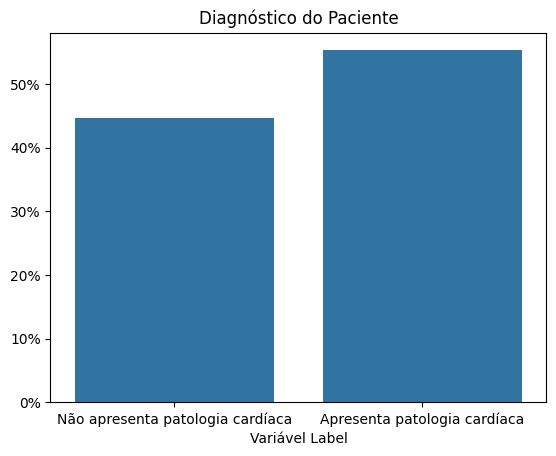

In [ ]:
# Gráfico de barras
ax = sns.countplot(x=df['Label'], stat='probability')

plt.title('Diagnóstico do Paciente')
ax.set_xlabel('Variável Label')
ax.set_ylabel('')
# Adicionar labels a cada barra
labels = ['Não apresenta patologia cardíaca', 'Apresenta patologia cardíaca']
ax.set_xticklabels(labels)
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

plt.show()

Análise:  
No estudo, 55% dos pacientes apresentavam patologia cardíaca e 45% não apresentavam esta patologia.  

<br>

##### Análise do atributo idade dos pacientes  

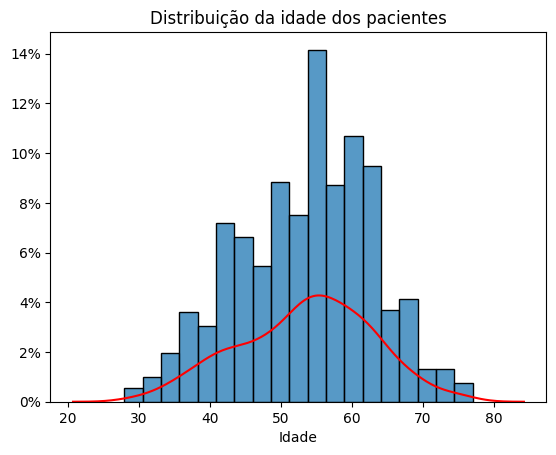

In [ ]:
ax = sns.histplot(df['Age'], stat='probability')
sns.kdeplot(df['Age'], ax=ax, color='red')
plt.title('Distribuição da idade dos pacientes')
ax.set_xlabel('Idade')
ax.set_ylabel('')
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
plt.show()

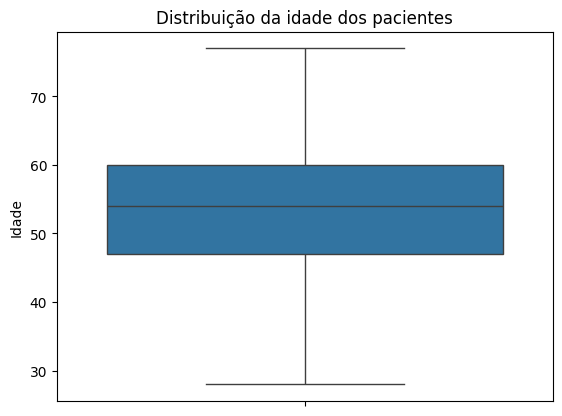

In [ ]:
ax = sns.boxplot(df['Age'])
plt.title('Distribuição da idade dos pacientes')
ax.set_ylabel('Idade')
plt.show()

Análise:  
* A média etária da população analisada é de 53 anos e 6 meses.
* Dos pacientes analisaddos, o mais novo tinha 28 anos e o mais velho 77.
* 25% da população estudada menos de 48 anos.  
* 50% tem entre 48 e 60 anos.  
* 25% tem mais de 60 anos.  

<br>

---

##### Análise do atributo sexo  

In [ ]:
df['Sex'].value_counts()

,count
Sex,
M,725
F,193


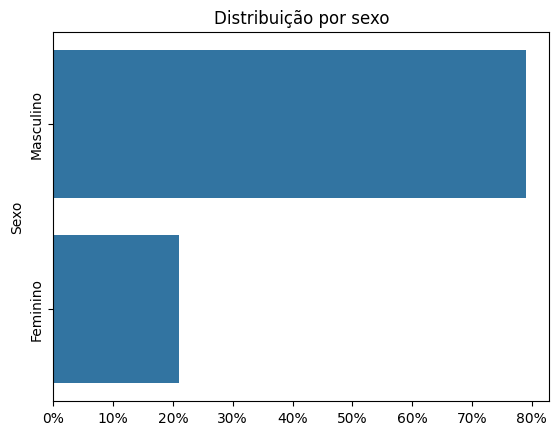

In [ ]:
ax = sns.countplot(df['Sex'], stat='probability')
plt.title('Distribuição por sexo')
ax.set_xlabel('')
ax.set_ylabel('Sexo')
labels = ['Masculino', 'Feminino']
ax.set_yticklabels(labels)
plt.yticks(rotation=90, va='center')
ax.xaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
plt.show()

##### Análise do tipo de dor no peito

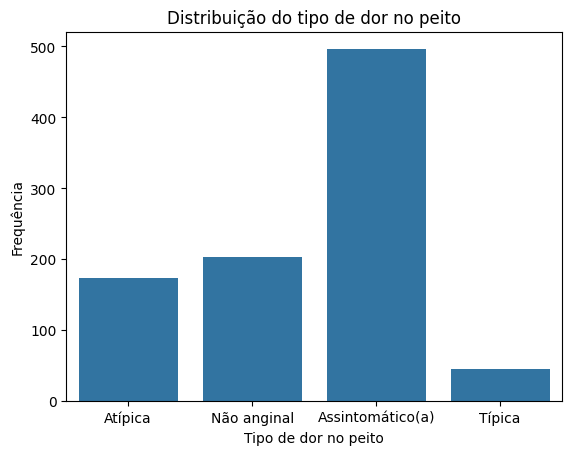

In [ ]:
ax = sns.countplot(x=df['ChestPainType'])
plt.title('Distribuição do tipo de dor no peito')
ax.set_ylabel('Frequência')
ax.set_xlabel('Tipo de dor no peito')
labels = ['Atípica', 'Não anginal', 'Assintomático(a)', 'Típica']
ax.set_xticklabels(labels)
plt.show()

---  

##### Análise do atributo pressão arterial em respouso

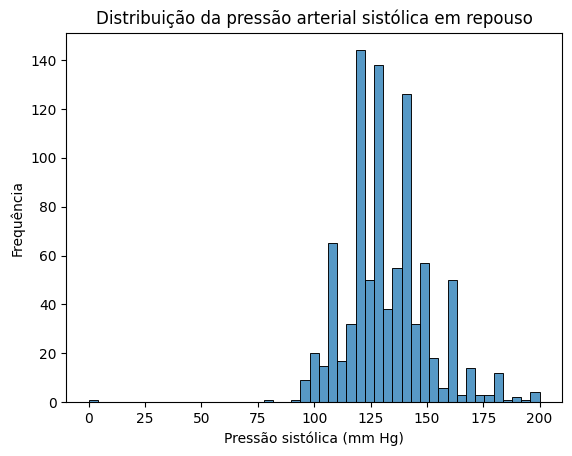

In [ ]:
ax = sns.histplot(df['RestingBP'])
plt.title('Distribuição da pressão arterial sistólica em repouso')
ax.set_xlabel('Pressão sistólica (mm Hg)')
ax.set_ylabel('Frequência')
plt.show()

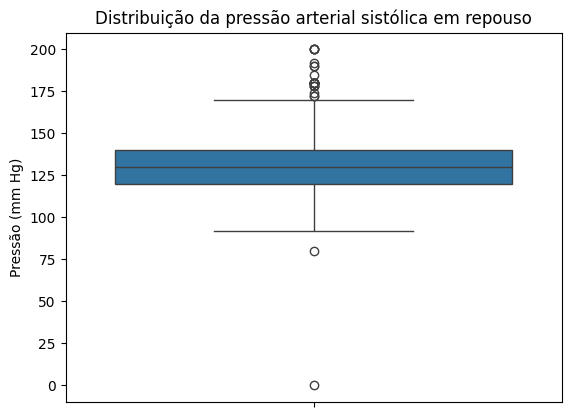

In [ ]:
ax = sns.boxplot(df['RestingBP'])
plt.title('Distribuição da pressão arterial sistólica em repouso')
ax.set_ylabel('Pressão (mm Hg)')
plt.show()

---  

##### Análise do atributo colesterol sérico

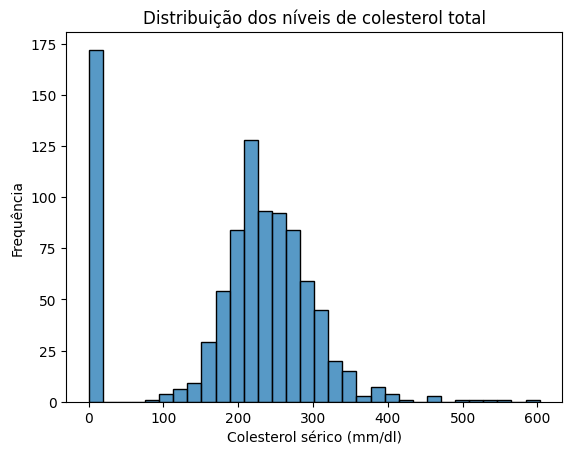

In [ ]:
ax = sns.histplot(df['Cholesterol'])
plt.title('Distribuição dos níveis de colesterol total')
ax.set_xlabel('Colesterol sérico (mm/dl)')
ax.set_ylabel('Frequência')
plt.show()

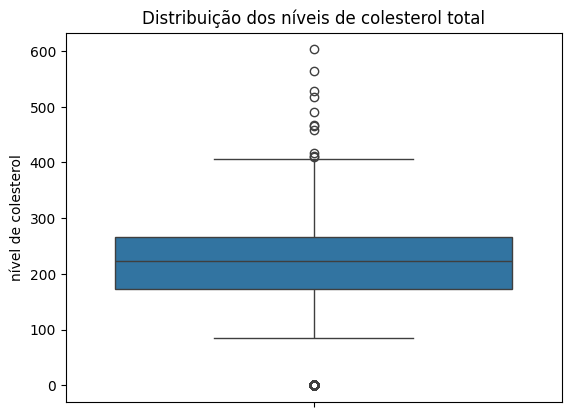

In [ ]:
ax = sns.boxplot(df['Cholesterol'])
plt.title('Distribuição dos níveis de colesterol total')
ax.set_ylabel('nível de colesterol')
plt.show()

###### Estudo de níveis atípicos de colesterol

In [ ]:
colest = (df['Cholesterol'] == 0).sum()
perc_col = colest / len(df['Cholesterol']) * 100
print(colest, 'observações apresentam nível de colesterol iguais a zero.')
print('Isto equivale a %.2f%% do total de observações.' % perc_col)

172 observações apresentam nível de colesterol iguais a zero.
Isto equivale a 18.74% do total de observações.


In [ ]:
colest = (df['Cholesterol'] > 400).sum()
perc_col = colest / len(df['Cholesterol']) * 100
print(colest, 'observações apresentam nível de colesterol acima de 400.')
print('Isto equivale a %.2f%% do total de observações.' % perc_col)

13 observações apresentam nível de colesterol acima de 400.
Isto equivale a 1.42% do total de observações.


In [ ]:
df[df['Cholesterol'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,0,0,Normal,93,Y,0.00,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.70,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.50,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.70,Flat,1
297,57,M,ASY,110,0,1,ST,131,Y,1.40,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122,0,0,Normal,120,N,0.50,Up,1
515,63,M,NAP,130,0,1,ST,160,N,3.00,Flat,0
518,48,M,NAP,102,0,1,ST,110,Y,1.00,Down,1
535,56,M,ASY,130,0,0,LVH,122,Y,1.00,Flat,1


OBSERVAÇÃO:  
Os níveis saudáveis de colesterol total geralmente são classificados da seguinte forma:  

* Colesterol Total Desejável (Saudável): Menos de 200 mg/dL (miligramas por decilitro)  
* Colesterol Total Limítrofe Alto: 200–239 mg/dL  
* Colesterol Total Alto: 240 mg/dL ou mais  

<br>

Análise:  
Na população estudada, apenas 25% dos pacientes possuem nível de colesterol total considerado normal (<200 mg/dL), ou seja, 75% das pessoas apresentam níveis elevados de colesterol.    

<br>

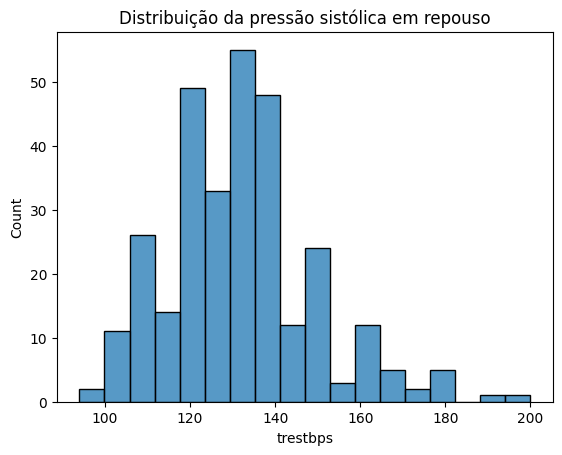

In [ ]:
sns.histplot(df['trestbps'])
plt.title('Distribuição da pressão sistólica em repouso')
plt.show()

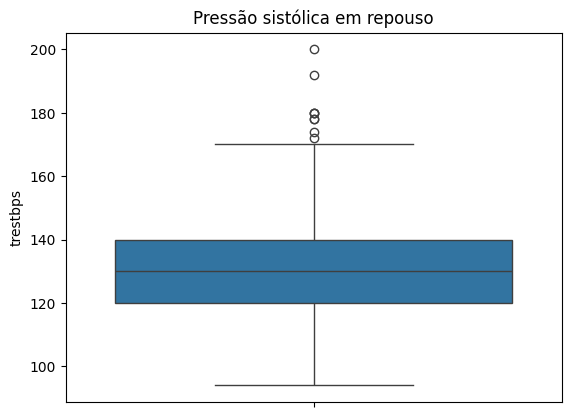

In [ ]:
sns.boxplot(df['trestbps'])
plt.title('Pressão sistólica em repouso')
plt.show()

Análise:  
Apenas 25% dos pacientes estudados possuem pressão sistólica considerada normal (abaixo de 120 mmHg), ou seja, 75% apresentam níveis elevados de pressão sistólica.  

<br>

In [ ]:
# Verifica paciente com pressão sistólica acima de 170 mmHg
df[df['trestbps'] > 170]

KeyError: 'trestbps'

Análise:  
Nove pacientes apresentaram pressão sistólica em repouso acima 170 mmHg.  

<br>

##### Análise de Outliers

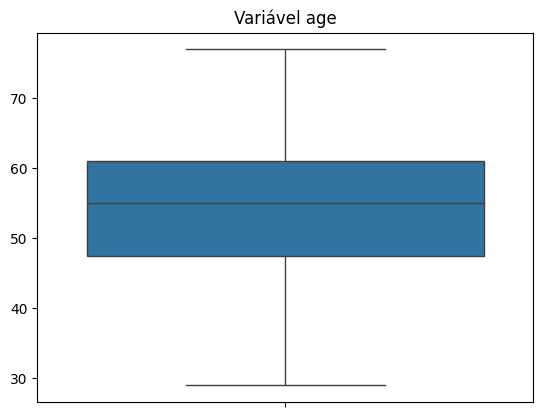

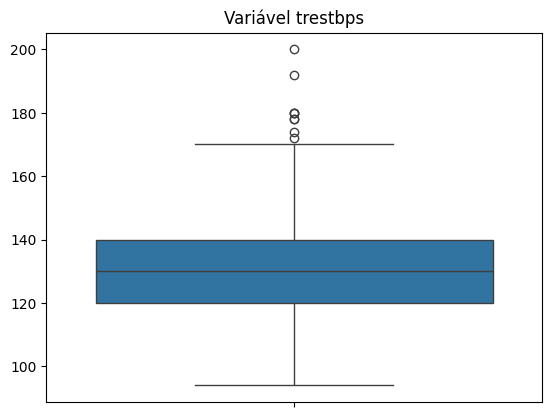

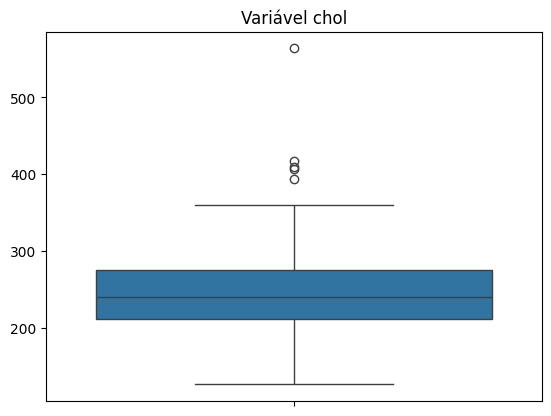

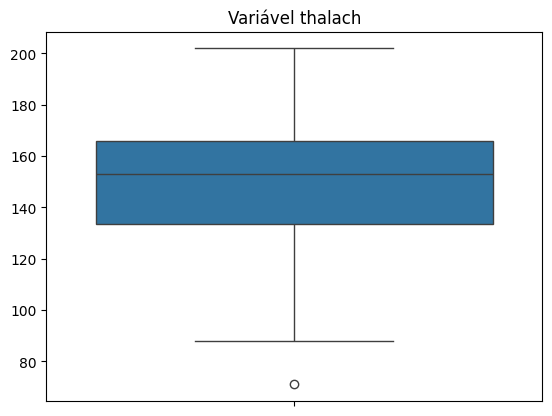

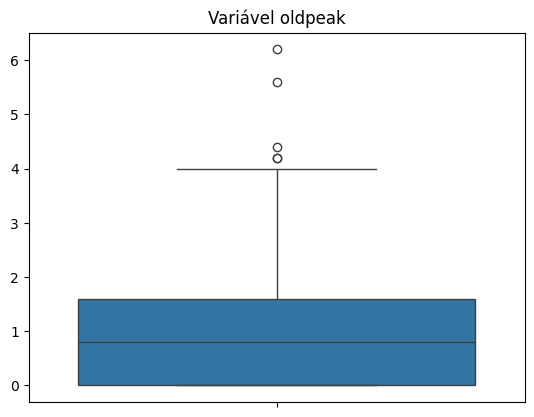

In [ ]:
var_numericas = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
for coluna in var_numericas:
  sns.boxplot(df[coluna].values)
  plt.title('Variável ' + coluna)
  plt.show()


Análise:  

O estudo das variáveil pressão arterial sistólica em respouso *(trstbps)*, colesterol sérico *(chol)*, frequência cardíaca máxima atingida *(thalach)* e depressão do segmento ST induzida por exercício em relação ao repouso *(oldpeak)* mostraram a presença de valores que podem ser considerados outliers, porém do ponto de vista clínico, é possível que um indivíduo apresente tais indicadores, sendo assim, decidiu-se pela manutenção destas observações no modelo.  



---

<br>

#### Análise Gráfica Bivariada

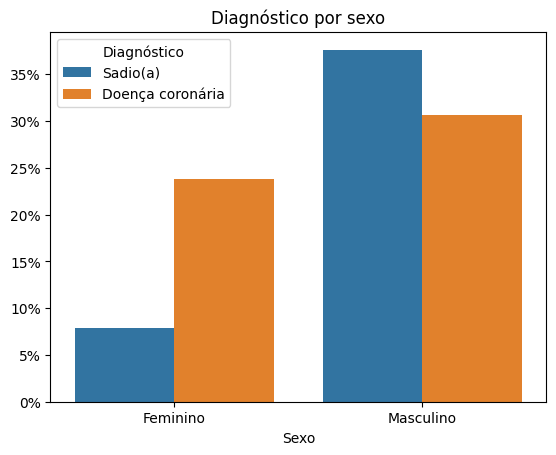

In [ ]:
# Gráfico de barras
ax = sns.countplot(data=df,x='sex', hue = "label", stat='probability')

plt.title('Diagnóstico por sexo')
ax.set_xlabel('Sexo')
ax.set_ylabel('')
# Adicionar labels a cada barra
labels = ['Feminino', 'Masculino']
ax.set_xticklabels(labels)
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
# Customizar o título da legenda do hue
new_hue_labels = ['Sadio(a)', 'Doença coronária']
ax.legend(title='Diagnóstico', labels=new_hue_labels)
# Plotar o gráfico
plt.show()

Análise:  
De toda a população analisada 8% eram mulheres que não apresentavam insuficiência cardíaca e quase 25% eram mulheres que apresentavam a patologia. Por outro lado, em torno de 37% eram homens sem insuficiência cardíaca e 30% apresentavam a patologia.  

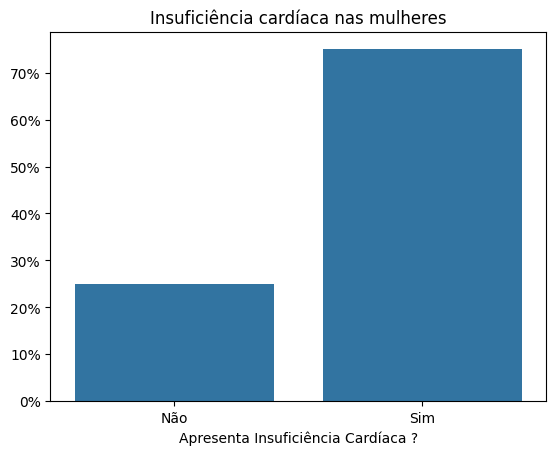

In [ ]:
df_mulheres = df[df['sex'] == 0]

# Gráfico de barras
ax = sns.countplot(x=df_mulheres['label'], stat='probability')

plt.title('Insuficiência cardíaca nas mulheres')
ax.set_xlabel('Apresenta Insuficiência Cardíaca ?')
ax.set_ylabel('')
# Adicionar labels a cada barra
labels = ['Não', 'Sim']
ax.set_xticklabels(labels)
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
# Plotar o gráfico
plt.show()

Análise:  
Na população analisada, 70% eram homens e 30% mulheres, porém mais de 70% das mulheres apresentavam insufuciência cardíaca.  Já nos homens, embora fossem mais numerosos no estudo, apenas 45% apresentavam insuficiência cardíaca.  

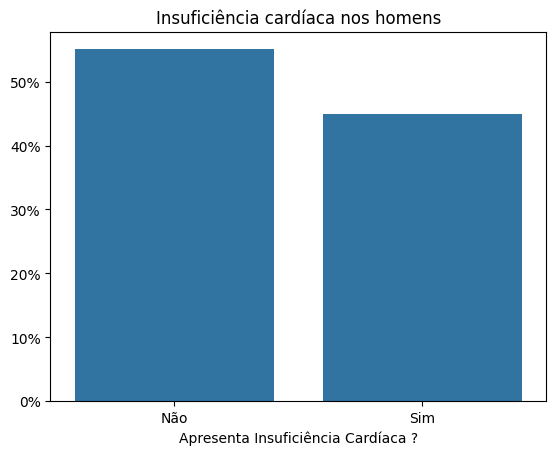

In [ ]:
df_homens = df[df['sex'] == 1]

# Gráfico de barras
ax = sns.countplot(x=df_homens['label'], stat='probability')

plt.title('Insuficiência cardíaca nos homens')
ax.set_xlabel('Apresenta Insuficiência Cardíaca ?')
ax.set_ylabel('')
# Adicionar labels a cada barra
labels = ['Não', 'Sim']
ax.set_xticklabels(labels)
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
# Plotar o gráfico
plt.show()

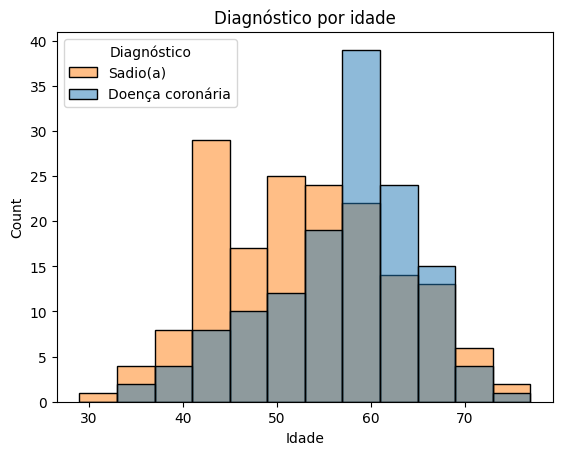

In [ ]:
# Gráfico de barras
ax = sns.histplot(data=df,x='age', hue = "label")

# Adicionar título ao gráfico
plt.title('Diagnóstico por idade')
# Customizar o título do eixo x
ax.set_xlabel('Idade')
# Customizar o título da legenda do hue
new_hue_labels = ['Sadio(a)', 'Doença coronária']
ax.legend(title='Diagnóstico', labels=new_hue_labels)
# Plotar o gráfico
plt.show()

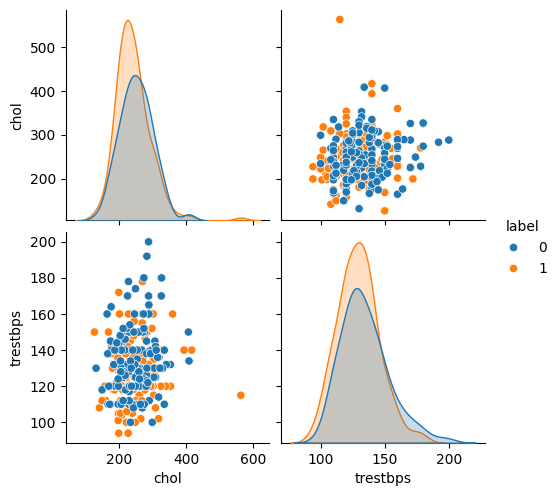

In [ ]:
ax = sns.pairplot(df[['chol', 'trestbps', 'label']], hue="label")
# Adicionar título ao gráfico
plt.title('Diagnóstico por idade')
# Customizar o título da legenda do hue
new_hue_labels = ['Sadio(a)', 'Doença coronária']
#t.legend(title='Diagnóstico', labels=new_hue_labels)
plt.show()

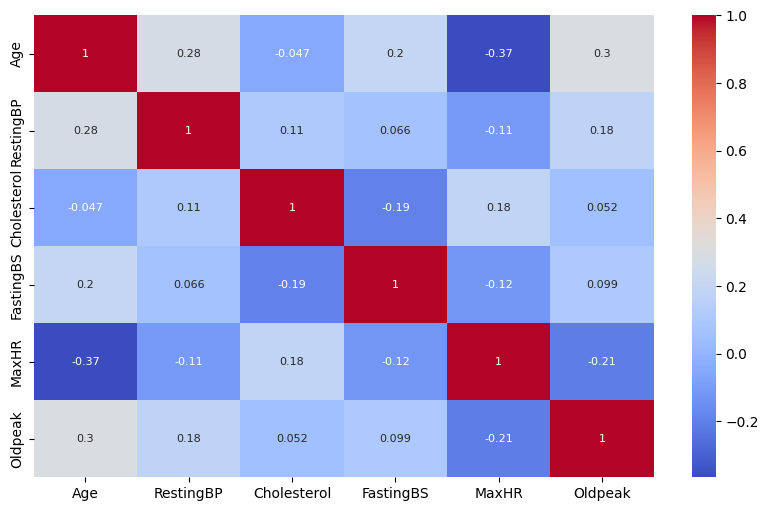

In [ ]:
#Create a correlation heatmap
corr = df_num.corr(method='spearman')
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', annot_kws={"size": 8})
plt.show()

In [ ]:
# Select the numeric columns (X is the feature matrix)
X = df.select_dtypes(include=[np.number])

# Add a constant column for VIF calculation
X['intercept'] = 1

# Calculate VIF for each feature
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['Feature'] = X.columns

# Display the VIF values
print(vif)

     VIF       Feature
0   1.31           Age
1   1.10     RestingBP
2   1.19   Cholesterol
3   1.16     FastingBS
4   1.35         MaxHR
5   1.28       Oldpeak
6   1.51  HeartDisease
7 144.02     intercept


Não há ocorrência de multicolinearidade

---

<br>

### Etapa 3: Pré-processamento  

#### Renomear o atributo **HeartDisease** para **Label**

In [11]:
df.rename(columns={'HeartDisease' : 'Label'}, inplace=True)

#### Criação dos pipelines de transformações

In [12]:
features_num = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
features_cat = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
label = ['Label']

##### Pipeline de atributos numéricos  

In [13]:
features_num_transformer = Pipeline(steps=[('scaler', StandardScaler())])

##### Pipeline de atributos categóricos

In [14]:
features_cat_transformer = Pipeline(steps=[('encoder', OneHotEncoder())])

In [15]:
features_preprocessor = ColumnTransformer(
    transformers=[
        ('features_num', features_num_transformer, features_num),
        ('features_cat', features_cat_transformer, features_cat)
    ]
)

<br>

#### Preparando o conjunto de dados

In [ ]:
X=df.drop('Label', axis=1) # X contém todos os atributos menos o label
y=df['Label']

#### Divisão da base de dados em treinamento e teste

In [ ]:
X_train, X_test, y_train ,y_test = train_test_split(X, y, test_size=0.2, random_state=44)

<br>

#### Feature selection  
##### Definir o valor ideal de k

In [ ]:
# Definir o valor ideal de K
for k in range(1, 12):
  pipeline = Pipeline([
      ('features_preprocessor', features_preprocessor),
      ('select_k_best', SelectKBest(f_classif, k=k)),
      ('classifier', GaussianNB())
  ])

  pipeline.fit(X_train, y_train)

  cv_results = cross_validate(pipeline, X_train, y_train, cv=5)
  print('Features=',k,' Acc=',np.mean(cv_results['test_score']))

Features= 1  Acc= 0.8133631534805703
Features= 2  Acc= 0.8133631534805703
Features= 3  Acc= 0.8133538346845588
Features= 4  Acc= 0.8419625384400335
Features= 5  Acc= 0.8242195508340323
Features= 6  Acc= 0.8351691361476098
Features= 7  Acc= 0.8296896840928152
Features= 8  Acc= 0.8378622681949492
Features= 9  Acc= 0.8487559407324573
Features= 10  Acc= 0.8501258037461561
Features= 11  Acc= 0.8528468921815302


##### Definir as variáveis a serem utilizadas

In [ ]:
k = 11  # You can change this to the number of features you want to select

pipeline = Pipeline([
    ('features_preprocessor', features_preprocessor),
    ('select_k_best', SelectKBest(score_func=f_classif, k=k))
])

X_train_selected = pipeline.fit_transform(X_train, y_train)
X_test_selected = pipeline.transform(X_test)

selector = pipeline.named_steps['select_k_best']
mask = selector.get_support()

preprocessed_feature_names = pipeline.named_steps['features_preprocessor'].get_feature_names_out()
selected_features_names = preprocessed_feature_names[mask]

print(f"Feature mais importantes: {selected_features_names}")

Feature mais importantes: ['features_num__FastingBS' 'features_num__MaxHR' 'features_num__Oldpeak'
 'features_cat__Sex_F' 'features_cat__Sex_M'
 'features_cat__ChestPainType_ASY' 'features_cat__ChestPainType_ATA'
 'features_cat__ExerciseAngina_N' 'features_cat__ExerciseAngina_Y'
 'features_cat__ST_Slope_Flat' 'features_cat__ST_Slope_Up']


#### Atributos mais importantes para a modelagem  
* age: &nbsp;idade    
* sex: &nbsp;sexo    
* cp: &nbsp;tipo de dor no peito  
* thalach: &nbsp;máxima frequência cardíaca atingida  
* exang: &nbsp;angina induzida por exercício   
* oldpeak: &nbsp;depressão do segmento ST induzida por exercício em relação ao repouso  
* slope: &nbsp;inclinação do segmento ST no pico do exercício  
* ca: &nbsp;número de vasos principais (0-3) evidenciados por fluoroscopia

#### Criar novo dataframe utilizando apenas as variáveis selecionadas

In [ ]:
# Renomeando o dataset ajustado para X_train e X_test
X_train = X_train_selected
X_test = X_test_selected

---

<br>

### Etapa 4: Modelagem

#### Verificação do modelo com maior acurácia sem ajuste de hiperparâmetros

In [ ]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models_sorted = models.sort_index()

models

100%|██████████| 29/29 [00:03<00:00,  9.51it/s]


[LightGBM] [Info] Number of positive: 405, number of negative: 329
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000167 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 390
[LightGBM] [Info] Number of data points in the train set: 734, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.551771 -> initscore=0.207829
[LightGBM] [Info] Start training from score 0.207829
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
SVC,0.88,0.88,0.88,0.88,0.08
RandomForestClassifier,0.88,0.88,0.88,0.88,0.41
NuSVC,0.86,0.86,0.86,0.86,0.08
ExtraTreesClassifier,0.86,0.86,0.86,0.86,0.21
LinearDiscriminantAnalysis,0.85,0.85,0.85,0.85,0.04
RidgeClassifier,0.85,0.85,0.85,0.85,0.04
BernoulliNB,0.84,0.84,0.84,0.84,0.03
XGBClassifier,0.84,0.84,0.84,0.84,0.88
RidgeClassifierCV,0.84,0.84,0.84,0.84,0.09


---

<br>

#### **Modelo 1: Stochastic Gradient Descent Classifier**

In [ ]:
# Criação do pipeline de dados
pipeline_sgd = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', SGDClassifier(random_state=42))
])

# Definição dos hiperparâmetros a serem ajustados
hyperparams_sgd = {
    'clf__loss': ['hinge', 'log_loss', 'modified_huber', 'squared_hinge',
                  'perceptron', 'squared_error', 'huber', 'epsilon_insensitive',
                  'squared_epsilon_insensitive'],
    'clf__alpha': np.logspace(-6, 1, 10),
    'clf__penalty': ['l2', 'l1', 'elasticnet', 'none'],
    'clf__l1_ratio': [0, 0.1, 0.5, 0.9],
    'clf__max_iter': [1000, 2000],
    'clf__tol': [1e-4, 1e-3],
    'clf__learning_rate': ['optimal', 'constant', 'adaptive'],
    'clf__class_weight': [None, 'balanced']
}

# Utilizar k-fold cross validation
strat_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Ajustar os hiperparâmetros utilizando Grid Search
model = GridSearchCV(pipeline_sgd, param_grid=hyperparams_sgd,
                           cv=strat_kfold, scoring='accuracy',
                           n_jobs=-1)

model.fit(X_train, y_train)

print("Melhores parâmetros: ", model.best_params_)
print(f"Melhor acurácia encontrada na base de treinamento: {model.best_score_:.8f}")

# Salvar o log de treinamento
grava_log_train('Grid_search_train.log')

Melhores parâmetros:  {'clf__alpha': 0.007742636826811269, 'clf__class_weight': 'balanced', 'clf__l1_ratio': 0, 'clf__learning_rate': 'optimal', 'clf__loss': 'modified_huber', 'clf__max_iter': 1000, 'clf__penalty': 'l2', 'clf__tol': 0.0001}
Melhor acurácia encontrada na base de treinamento: 0.85909864


In [ ]:
# Utilização do modelo na base de teste
sgd_clf = model.best_estimator_
sgd_clf.fit(X_train, y_train)

# Avaliação do modelo na base de teste
test_accuracy = sgd_clf.score(X_test, y_test)
print(f'Acurácia do modelo SGD na base de teste: {test_accuracy}')

NameError: name 'model' is not defined

In [ ]:
# Salvar o modelo
joblib.dump(sgd_clf, 'Heart_Failure_Prediction_SGDClassifier_model.joblib')

['Heart_Failure_Prediction_SGDClassifier_model.joblib']

---

<br>

#### **Modelo 2: GaussianNB Classifier**

In [ ]:
# Criação do pipeline de dados
pipeline_gnb = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', GaussianNB())
])

# Definição dos hiperparâmetros a serem ajustados
hyperparams_gnb = {
    'clf__var_smoothing': np.logspace(-15, -5, num=100)
}

# Utilizar k-fold cross validation
strat_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Ajustar os hiperparâmetros utilizando Grid Search
model = GridSearchCV(pipeline_gnb, param_grid=hyperparams_gnb,
                           cv=strat_kfold, scoring='accuracy',
                           n_jobs=-1)

# Treinar o modelo com os melhores hiperparâmetros
model.fit(X_train, y_train)

print("Melhores parâmetros: ", model.best_params_)
print(f"Melhor acurácia encontrada na base de treinamento: {model.best_score_:.8f}")

# Salvar o log de treinamento
grava_log_train('Grid_search_train_GNB.log')

Melhores parâmetros:  {'clf__var_smoothing': 1e-15}
Melhor acurácia encontrada na base de treinamento: 0.83869048


In [ ]:
# Utilização do modelo na base de teste
clf_gnb = model.best_estimator_
clf_gnb.fit(X_train, y_train)

# Avaliação do modelo na base de teste
test_accuracy = clf_gnb.score(X_test, y_test)
print(f'Acurácia do modelo na base de teste: {test_accuracy}')

Acurácia do modelo na base de teste: 0.8688524590163934


In [ ]:
# Salvar o modelo
joblib.dump(clf_gnb, 'Heart_Failure_Prediction_GaussianNB_model.joblib')

['Heart_Failure_Prediction_GaussianNB_model.joblib']

---

<br>

#### Modelo 3: Quadratic Discriminant Analysis (QDA)

In [ ]:
# Criação do pipeline de dados
pipeline_qda = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', QuadraticDiscriminantAnalysis())
])

# Definição dos hiperparâmetros a serem ajustados
hyperparams_qda = {
    'clf__reg_param': np.logspace(-5, 1, 20)
}

# Utilizar k-fold cross validation
strat_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Ajustar os hiperparâmetros utilizando Grid Search
model = GridSearchCV(pipeline_qda, param_grid=hyperparams_qda,
                           cv=strat_kfold, scoring='accuracy',
                           n_jobs=-1)

# Treinar o modelo com os melhores hiperparâmetros
model.fit(X_train, y_train)

print("Melhores parâmetros: ", model.best_params_)
print(f"Melhor acurácia encontrada na base de treinamento: {model.best_score_:.8f}")

# Salvar o log de treinamento
grava_log_train('Grid_search_train_QDA.log')

Melhores parâmetros:  {'clf__reg_param': 0.26366508987303555}
Melhor acurácia encontrada na base de treinamento: 0.84277211


In [ ]:
# Utilização do modelo na base de teste
clf_qda = model.best_estimator_
clf_qda.fit(X_train, y_train)

# Avaliação do modelo na base de teste
test_accuracy = clf_qda.score(X_test, y_test)
print(f'Acurácia do modelo na base de teste: {test_accuracy}')

Acurácia do modelo na base de teste: 0.8688524590163934


In [ ]:
# Salvar o modelo
joblib.dump(clf, 'Heart_Failure_Prediction_QDA_model.joblib')

['Heart_Failure_Prediction_QDA_model.joblib']

---

<br>

#### Modelo 4: Linear Support Vector Classifier

In [ ]:
# Criação do pipeline de dados
#pipeline_lsvc = Pipeline(steps=[
#    ('scaler', StandardScaler()),
#    ('clf', LinearSVC())
#])

pipeline_lsvc = Pipeline([
    ('features_preprocessor', features_preprocessor),
    ('clf', LinearSVC())
])

# Definição dos hiperparâmetros a serem ajustados
hyperparams_lsvc = [{
    'clf__C': np.logspace(-3, 2, 10),
    'clf__penalty': ['l2'],
    'clf__dual': [True, False],
    'clf__loss': ['hinge', 'squared_hinge'],
    'clf__class_weight': [None, 'balanced'],
    'clf__tol': np.logspace(-5, 0, 10),
    'clf__max_iter': [1000, 5000, 10000]
},
{
    'clf__C': np.logspace(-3, 2, 10),
    'clf__penalty': ['l1'],
    'clf__dual': [False],
    'clf__loss': ['hinge', 'squared_hinge'],
    'clf__class_weight': [None, 'balanced'],
    'clf__tol': np.logspace(-5, 0, 10),
    'clf__max_iter': [1000, 5000, 10000]
}]

# Utilizar k-fold cross validation
strat_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Ajustar os hiperparâmetros utilizando Random Search
model = RandomizedSearchCV(pipeline_lsvc, param_distributions=hyperparams_lsvc,
                           cv=strat_kfold, scoring='accuracy',
                           n_jobs=-1)

# Treinar o modelo com os melhores hiperparâmetros
model.fit(X_train, y_train)

print("Best parameters found: ", model.best_params_)
print(f"Best cross-validated accuracy: {model.best_score_:.8f}")

# Salvar o log de treinamento
grava_log_train('Grid_search_train_LSVC.log')

Best parameters found:  {'clf__tol': 0.2782559402207126, 'clf__penalty': 'l2', 'clf__max_iter': 1000, 'clf__loss': 'squared_hinge', 'clf__dual': False, 'clf__class_weight': None, 'clf__C': 2.1544346900318843}
Best cross-validated accuracy: 0.86787811


In [ ]:
# Utilização do modelo na base de teste
clf_lsvc = model.best_estimator_
clf_lsvc.fit(X_train, y_train)

# Avaliação do modelo na base de teste
test_accuracy = clf_lsvc.score(X_test, y_test)
print(f'Acurácia do modelo na base de teste: {test_accuracy}')

Acurácia do modelo na base de teste: 0.8478260869565217


In [ ]:
# Salvar o modelo
joblib.dump(clf_lsvc, 'Heart_Failure_Prediction_LSVC_model.joblib')

['Heart_Failure_Prediction_LSVC_model.joblib']

---

<br>

#### Modelo 5: Logistic Regression  

In [ ]:
# Criação do pipeline de dados
#pipeline_logreg = Pipeline([
#    ('scaler', StandardScaler()),
#    ('clf', LogisticRegression())
#])

pipeline_logreg = Pipeline([
    ('features_preprocessor', features_preprocessor),
    ('clf', LogisticRegression())
])


# Definição dos hiperparâmetros a serem ajustados
hyperparams_logreg = [{
    'clf__C': np.logspace(-5, 4, 20),
    'clf__penalty': ['l1', 'l2'],
    'clf__solver': ['liblinear'],
    'clf__class_weight': [None, 'balanced'],
    'clf__max_iter': [100, 200],
    'clf__tol': [1e-4, 1e-3]
},
{
    'clf__C': np.logspace(-5, 4, 20),
    'clf__penalty': ['l1', 'l2', 'elasticnet'],
    'clf__solver': ['newton-cg', 'lbfgs', 'sag'],
    'clf__class_weight': [None, 'balanced'],
    'clf__max_iter': [100, 200],
    'clf__tol': [1e-4, 1e-3]
},
{
    'clf__C': np.logspace(-5, 4, 20),
    'clf__penalty': ['l1', 'elasticnet'],
    'clf__solver': ['saga'],
    'clf__l1_ratio': np.linspace(0, 1, 10),  # Only for elasticnet
    'clf__class_weight': [None, 'balanced'],
    'clf__max_iter': [100, 200],
    'clf__tol': [1e-4, 1e-3]
}
]

# Utilizar k-fold cross validation
strat_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Ajustar os hiperparâmetros utilizando Random Search
model = RandomizedSearchCV(pipeline_logreg, param_distributions=hyperparams_logreg,
                           cv=strat_kfold, scoring='accuracy',
                           n_jobs=-1)

# Treinar o modelo com os melhores hiperparâmetros
model.fit(X_train, y_train)

print("Best parameters found: ", model.best_params_)
print(f"Best cross-validated accuracy: {model.best_score_:.8f}")

# Salvar o log de treinamento
grava_log_train('Grid_search_train_LOGREG.log')

Best parameters found:  {'clf__tol': 0.0001, 'clf__solver': 'liblinear', 'clf__penalty': 'l2', 'clf__max_iter': 200, 'clf__class_weight': None, 'clf__C': 0.06158482110660261}
Best cross-validated accuracy: 0.86514770


In [ ]:
# Utilização do modelo na base de teste
clf_logreg = model.best_estimator_
clf_logreg.fit(X_train, y_train)

# Avaliação do modelo na base de teste
test_accuracy = clf_logreg.score(X_test, y_test)
print(f'Acurácia do modelo na base de teste: {test_accuracy}')

Acurácia do modelo na base de teste: 0.8206521739130435


In [ ]:
# Salvar o modelo
joblib.dump(clf_logreg, 'Heart_Failure_Prediction_SVC_model.joblib')

['Heart_Failure_Prediction_SVC_model.joblib']

---

<br>

### Previsão

In [ ]:
# Load the saved model
clf = joblib.load('Heart_Failure_Prediction_GaussianNB_model.joblib')

# Use the loaded model to make predictions
y_pred = clf.predict(X_test)

# Compute the confusion matrix
class_report = classification_report(y_test, y_pred)

# Print the confusion matrix
print("Classification Report")
print(class_report)

Classification Report
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        28
           1       0.88      0.88      0.88        33

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

